/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3151 - loss: 2.1636 - val_accuracy: 0.7257 - val_loss: 1.5964
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 1.3540 - val_accuracy: 0.8090 - val_loss: 0.8183
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8876 - loss: 0.6374 - val_accuracy: 0.8785 - val_loss: 0.4767
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9326 - loss: 0.3553 - val_accuracy: 0.9306 - val_loss: 0.3298
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9451 - loss: 0.2581 - val_accuracy: 0.9410 - val_loss: 0.2682
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9707 - loss: 0.1789 - val_accuracy: 0.9340 - val_loss: 0.2297
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9482 - loss: 0.1739 - val_accuracy: 0.9444 - val_loss: 0.1987
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.1266 - val_accuracy: 0.9410 - val_loss

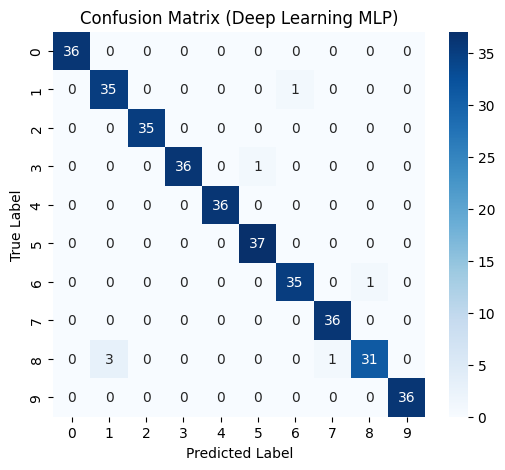

=== Classification Report (Deep Learning) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        37
           6       0.97      0.97      0.97        36
           7       0.97      1.00      0.99        36
           8       0.97      0.89      0.93        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [1]:
# -----------------------------
# 1) 라이브러리 임포트
# -----------------------------
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

# -----------------------------
# 2) 데이터 로드 및 전처리
# -----------------------------
digits = datasets.load_digits()

# X, y를 numpy 변환
X = np.array(digits.data, dtype=np.float32)
y = np.array(digits.target)

# 정규화 (0~16 → 0~1)
X = X / 16.0

# -----------------------------
# 3) 원-핫 인코딩
# -----------------------------
num_classes = len(np.unique(y))
y_onehot = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# -----------------------------
# 4) 데이터 분할
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 5) 딥러닝 모델 정의 (MLP)
# -----------------------------
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 6) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# -----------------------------
# 7) 모델 평가
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n=== Test Accuracy (Deep Learning) : {test_acc:.4f} ===")

# -----------------------------
# 8) Confusion Matrix
# -----------------------------
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.title("Confusion Matrix (Deep Learning MLP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------
# 9) 분류 리포트
# -----------------------------
print("=== Classification Report (Deep Learning) ===")
print(classification_report(y_true_classes, y_pred_classes))
